# hdb_sales - Python coding using google colab

### Introduction - What is does - ETL 

*   Extract : goto srx web site to find the bar chart data
*   Transform : build our own dataset from the extracted information
*   Loading : create visualization or export to Excel for more





below codes is to calling "additional library" from public pool of codes called GITHUB. 

There were some useful reusable codes objects to use.

In [1]:
# We only do the import once throughout the session
import requests                  # to retrieve web page HTML codes which contains the sales information
import json                      # dictionary object transported from a web page containing a long string of sales information 
import pandas as pd              # for the dataframe , the virtual excel table

There is an animated horizontal bar chart dashboard called "**Top 20 HDB Flat Median Prices by Town and Flat Type 2013 - 2020**" 

from this site
https://www.srx.com.sg/


Can you find the data and extract it out ? 

In [2]:
url = "https://www.srx.com.sg/"
fileobj = requests.get( url )
print("List of elements in fileobj object")
elements = [ e for e in dir(fileobj) if not e.startswith('_') ]
elements[-5:]

List of elements in fileobj object


['reason', 'request', 'status_code', 'text', 'url']

### Step 1 - Exploring from main page of the portal

If you view this site **https://www.srx.com.sg/** and right mouse click to find the menu option "view page source".
You will find the HTML source code of the page. What we are doing is to download the HTML "page source" into our memory. The text element of **fileobject** contains this HTML codes.

Do you know this page does not keep the sales information ? It points to another link instead, we are to dig out the URL address for that link. You can skip this block if you already know how to get it manually.


In [3]:
# this HTML codes takes about almost 8000 lines of text. We only shows first few lines below.
print( "sample content inside fileobj.text")
print( fileobj.text[:250] )

sample content inside fileobj.text
<!DOCTYPE html>
<html lang="en">

     <head>
    	<meta charset="utf-8">
    	<!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->
    	<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0,


As the HTML codes were really to long, reaching 8000 lines of codes.

We have to repeat the below steps a few time to get the URL of the chart.
*   filter the list using a matching keyword
*   find the matched element
*   if the content of the element is still very length, splits again
*   otherwise done, we are looking for the URL ( external web page  )



In [4]:
# split this HTML codes into an array or a list of lines which were seperated by '<div' keyword.
div_list = fileobj.text.split('<div')
print( "sample content inside div_list")
div_list[:10]

sample content inside div_list


['<!DOCTYPE html>\n<html lang="en">\n\n     <head>\n    \t<meta charset="utf-8">\n    \t<!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n    \t<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0" />\n    \t\n    \t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<meta name="google-site-verification" content="F1Offva_fTIHXOjlQ4wv6VxOaHjuu9xQuJe_Gsff5xY" />\n\t\t<meta name="google-site-verification" content="Ey56xwIXkAoetmVpowhuqV-spujHPzTqI4hYtmoh4mc" />\n\t\t<meta name="ahrefs-site-verification" content="ebf171461e4d8448ba61ca7598318f516f1902b264d34d7f24b55b311b6adcad">\n\t\t<meta name="facebook-domain-verification" content="q9rj79rrtguv3c2htouek75lc5jhqt" />\n\t\t\n<script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config=

In [5]:
# among the lines, one of which contains the data source link with the keyword 'data-src'
datasrc_list = [ div for div in div_list if 'data-src' in div ]
print( "inside the list object datasrc_list")
datasrc_list

inside the list object datasrc_list


[' class="flourish-embed flourish-bar-chart-race" data-src="visualisation/3957251" data-url="https://flo.uri.sh/visualisation/3957251/embed" aria-label=""><script src="https://public.flourish.studio/resources/embed.js"></script></div>\n\t\t\t\t</div>\n\t\t\t\t\n\t\t\t\t']

In [6]:
# datasrc_list is the list filtered by data-src , datasrc_list[0] is the first element in the list
# and we split this element into a list of shorter line of text seperated by space
print( "Split the first element of datasrc_list furtger into datasrc_tag_list" )
datasrc_tag_list = datasrc_list[0].split(' ')
datasrc_tag_list

Split the first element of datasrc_list furtger into datasrc_tag_list


['',
 'class="flourish-embed',
 'flourish-bar-chart-race"',
 'data-src="visualisation/3957251"',
 'data-url="https://flo.uri.sh/visualisation/3957251/embed"',
 'aria-label=""><script',
 'src="https://public.flourish.studio/resources/embed.js"></script></div>\n\t\t\t\t</div>\n\t\t\t\t\n\t\t\t\t']

In [7]:
# datasrc_tag_list is the list containing the data source information
print( "inside the list object tag_list")
tag_list = [ tag for tag in datasrc_tag_list if 'data-url' in tag ]
print( tag_list )

inside the list object tag_list
['data-url="https://flo.uri.sh/visualisation/3957251/embed"']


In [8]:
# url_list contains the URL address of the actual dashboard attached to the srx.com.sg web page
print( "split the first element of tag_list into url_list" )
url_list = tag_list[0].split('"')
print( url_list)

split the first element of tag_list into url_list
['data-url=', 'https://flo.uri.sh/visualisation/3957251/embed', '']


In [9]:
# save the URL into variable 'url' , you can even click it to view and confirm the bar chart
print( "find the element of url_list containing the URL" )
url_list = [ url for url in url_list if 'http' in url ]
url = url_list[0]
print( url )

find the element of url_list containing the URL
https://flo.uri.sh/visualisation/3957251/embed


### Step 2 - Extracting data the actual dashboard page

If you view this site **https://flo.uri.sh/visualisation/3957251/embed** and right mouse click to find the menu option "view page source".
You will find the HTML source code of the page. What we are doing is to download the HTML "page source" into our memory. The text element of **fileobject** contains this HTML codes.

Do you find the word '***Flourish_data***' inside ? This is using 3rd party visualization from **https://flourish.studio/**

In [10]:
# does it match the HTML codes of above URL ?
print( "fetch the html codes of the animated chart into fileobj using above URL" )
#del fileobj
#url = 'https://flo.uri.sh/visualisation/3957251/embed'
fileobj = requests.get( url )
print( "sample content inside fileobj.text")
print( fileobj.text[-250:] )

fetch the html codes of the animated chart into fileobj using above URL
sample content inside fileobj.text
data) {
				window.template.data[_Flourish_dataset] = _Flourish_data[_Flourish_dataset];
				window.template.data[_Flourish_dataset].column_names = _Flourish_data_column_names[_Flourish_dataset];
		}
		window.template.draw();
	</script></body></html>


Just like before, we were looking for the bar chart related data.

We have to repeat the below steps a few time to get our information.
*   filter the list using a matching keyword
*   find the matched element
*   if the content of the element is still very length, splits again
*   otherwise done, we found the data in JSON / dictionary format



In [11]:
# split this HTML codes into an array or a list of lines which were seperated by '<script' keyword.
print( "splits the html to blocks of scripts" ) 
scripts_blocks = fileobj.text.split("<script>")
scripts_blocks

splits the html to blocks of scripts


['<!DOCTYPE html><html><head>\n\t\t<meta charset="utf-8">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1">\n\n\t\t<link rel="stylesheet" type="text/css" href="https://flo.uri.sh/template/1517/v2/static/style.css">\n\t<title>HDB Flat Median Prices by Town and Flat Type </title></head>\n\t<body aria-hidden="true">\n\t\n\n',
 'window.Flourish = {"static_prefix":"https://flo.uri.sh/template/1517/v2/static","environment":"live"};</script>',
 'var template=function(t){"use strict";var e="undefined"!=typeof globalThis?globalThis:"undefined"!=typeof window?window:"undefined"!=typeof global?global:"undefined"!=typeof self?self:{};function n(t,e){return t(e={exports:{}},e.exports),e.exports}var r=function(t){return t&&t.Math==Math&&t},i=r("object"==typeof globalThis&&globalThis)||r("object"==typeof window&&window)||r("object"==typeof self&&self)||r("object"==typeof e&&e)||Function("return this")(),a=function(t){try{return!!t()}catch(t){return!0}},o=!a((function(){return 

In [12]:
# no need to entire scripts_blocks, it extract the element that contains the 'Flourish_data' keyword
print( "search for the first block having the bar chart datawith keyword = Flourish_data" )
data_blocks = [ x for x in scripts_blocks if 'Flourish_data' in x ]
first_datablock = data_blocks[0]
first_datablock

search for the first block having the bar chart datawith keyword = Flourish_data


'\n\t\tfunction _Flourish_unflattenInto(dest, src) {\n\t\t\tdest = dest || {};\n\t\t\tfor (var k in src) {\n\t\t\t\tvar t = dest;\n\t\t\t\tfor (var i = k.indexOf("."), p = 0; i >= 0; i = k.indexOf(".", p = i+1)) {\n\t\t\t\t\tvar s = k.substring(p, i);\n\t\t\t\t\tif (!(s in t)) t[s] = {};\n\t\t\t\t\tt = t[s];\n\t\t\t\t}\n\t\t\t\tt[k.substring(p)] = src[k];\n\t\t\t}\n\t\t\treturn dest;\n\t\t}\n\t\tvar _Flourish_settings = {"axis_font_size":1,"bar_empty_spaces":false,"bar_min_value":0,"bar_opacity":0.9,"color.categorical_extend":false,"color.categorical_palette":["#695d5d","#edad08","#38a6a5","#483387"],"color_mode":"category","column_chart":false,"counter_font_size":6,"height_mode":"fill_space","label_color_in":"#fafafa","label_mode":"bars","layout.body_font":{"name":"Coda","url":"https://fonts.googleapis.com/css?family=Coda:400,700"},"layout.border.enabled":true,"layout.footer_note":"Copyright StreetSine Singapore Pte Ltd. All rights reserved.","layout.multiple_sources":true,"layout.sou

In [13]:
# split the first_datablock into shorter lines of text, seperated by '='
print( "split the first block into detail_blocks")
detail_blocks = first_datablock.split("=")
detail_blocks

split the first block into detail_blocks


['\n\t\tfunction _Flourish_unflattenInto(dest, src) {\n\t\t\tdest ',
 ' dest || {};\n\t\t\tfor (var k in src) {\n\t\t\t\tvar t ',
 ' dest;\n\t\t\t\tfor (var i ',
 ' k.indexOf("."), p ',
 ' 0; i >',
 ' 0; i ',
 ' k.indexOf(".", p ',
 ' i+1)) {\n\t\t\t\t\tvar s ',
 ' k.substring(p, i);\n\t\t\t\t\tif (!(s in t)) t[s] ',
 ' {};\n\t\t\t\t\tt ',
 ' t[s];\n\t\t\t\t}\n\t\t\t\tt[k.substring(p)] ',
 ' src[k];\n\t\t\t}\n\t\t\treturn dest;\n\t\t}\n\t\tvar _Flourish_settings ',
 ' {"axis_font_size":1,"bar_empty_spaces":false,"bar_min_value":0,"bar_opacity":0.9,"color.categorical_extend":false,"color.categorical_palette":["#695d5d","#edad08","#38a6a5","#483387"],"color_mode":"category","column_chart":false,"counter_font_size":6,"height_mode":"fill_space","label_color_in":"#fafafa","label_mode":"bars","layout.body_font":{"name":"Coda","url":"https://fonts.googleapis.com/css?family',
 'Coda:400,700"},"layout.border.enabled":true,"layout.footer_note":"Copyright StreetSine Singapore Pte Ltd. All rights 

In [14]:
# no need to entire detail_blocks, it extract the element that contains the keywords 'captions' and '000'
print( "filter the blocks by containing actual chart data" )
data_blocks = [x for x in detail_blocks if ('captions' in x) and ('000' in x) ]
data_blocks

filter the blocks by containing actual chart data


[' {"captions":[],"data":[{"category":"3RM","label":"Ang Mo Kio-3RM","values":["363,000","345,000","320,000","318,000","310,000","288,000","275,000","275,000"]},{"category":"4RM","label":"Ang Mo Kio-4RM","values":["490,000","465,000","457,750","465,000","460,000","445,000","405,000","405,000"]},{"category":"5RM","label":"Ang Mo Kio-5RM","values":["657,500","638,000","639,988","665,000","668,000","700,000","628,000","605,000"]},{"category":"EXE","label":"Ang Mo Kio-EXE","values":["815,500","809,000","810,000","785,000","850,000","815,000","801,444","792,500"]},{"category":"3RM","label":"Bedok-3RM","values":["347,000","325,000","305,000","300,000","300,000","290,000","278,000","275,000"]},{"category":"4RM","label":"Bedok-4RM","values":["452,000","430,000","410,000","410,000","415,000","405,000","390,000","388,000"]},{"category":"5RM","label":"Bedok-5RM","values":["620,000","575,000","568,000","555,000","569,000","580,000","562,000","560,000"]},{"category":"EXE","label":"Bedok-EXE","value

In [15]:
# split the first_data_block into shorter lines of text, seperated by ';'
print( "split the first data block into chartdata_list")
first_data_block = data_blocks[0]
chartdata_list = first_data_block.split(';')
chartdata_list

split the first data block into chartdata_list


[' {"captions":[],"data":[{"category":"3RM","label":"Ang Mo Kio-3RM","values":["363,000","345,000","320,000","318,000","310,000","288,000","275,000","275,000"]},{"category":"4RM","label":"Ang Mo Kio-4RM","values":["490,000","465,000","457,750","465,000","460,000","445,000","405,000","405,000"]},{"category":"5RM","label":"Ang Mo Kio-5RM","values":["657,500","638,000","639,988","665,000","668,000","700,000","628,000","605,000"]},{"category":"EXE","label":"Ang Mo Kio-EXE","values":["815,500","809,000","810,000","785,000","850,000","815,000","801,444","792,500"]},{"category":"3RM","label":"Bedok-3RM","values":["347,000","325,000","305,000","300,000","300,000","290,000","278,000","275,000"]},{"category":"4RM","label":"Bedok-4RM","values":["452,000","430,000","410,000","410,000","415,000","405,000","390,000","388,000"]},{"category":"5RM","label":"Bedok-5RM","values":["620,000","575,000","568,000","555,000","569,000","580,000","562,000","560,000"]},{"category":"EXE","label":"Bedok-EXE","value

In [16]:
# found the chart data in the JSON format but it is a long string actually
print( "Extract into chart data" )
chartdata = chartdata_list[0]
chartdata

Extract into chart data


' {"captions":[],"data":[{"category":"3RM","label":"Ang Mo Kio-3RM","values":["363,000","345,000","320,000","318,000","310,000","288,000","275,000","275,000"]},{"category":"4RM","label":"Ang Mo Kio-4RM","values":["490,000","465,000","457,750","465,000","460,000","445,000","405,000","405,000"]},{"category":"5RM","label":"Ang Mo Kio-5RM","values":["657,500","638,000","639,988","665,000","668,000","700,000","628,000","605,000"]},{"category":"EXE","label":"Ang Mo Kio-EXE","values":["815,500","809,000","810,000","785,000","850,000","815,000","801,444","792,500"]},{"category":"3RM","label":"Bedok-3RM","values":["347,000","325,000","305,000","300,000","300,000","290,000","278,000","275,000"]},{"category":"4RM","label":"Bedok-4RM","values":["452,000","430,000","410,000","410,000","415,000","405,000","390,000","388,000"]},{"category":"5RM","label":"Bedok-5RM","values":["620,000","575,000","568,000","555,000","569,000","580,000","562,000","560,000"]},{"category":"EXE","label":"Bedok-EXE","values

In [17]:
# convert the long string in dictionary format into real dictionary object
print( "Convert into dictionary object and get the formated data in JSON string" )
dict_obj = json.loads( chartdata )
result_object = dict_obj[ "data" ]
print( list(dict_obj) )

Convert into dictionary object and get the formated data in JSON string
['captions', 'data']


In [18]:
# convert from dictionary object to pandas dataframe object ( it is like virtual excel object )
print( "Convert to dataframe object" )
df = pd.DataFrame( result_object )
df.head(5)

Convert to dataframe object


,category,label,values
0,3RM,Ang Mo Kio-3RM,"[363,000, 345,000, 320,000, 318,000, 310,000, ..."
1,4RM,Ang Mo Kio-4RM,"[490,000, 465,000, 457,750, 465,000, 460,000, ..."
2,5RM,Ang Mo Kio-5RM,"[657,500, 638,000, 639,988, 665,000, 668,000, ..."
3,EXE,Ang Mo Kio-EXE,"[815,500, 809,000, 810,000, 785,000, 850,000, ..."
4,3RM,Bedok-3RM,"[347,000, 325,000, 305,000, 300,000, 300,000, ..."


### Step 3 - Transform the extracted data into visualization data

We need proper data layout for the target visualization to be loaded.
In this case, just a simple bar chart. 

The transformation is about adding/deleting/changing columns, computing values.

In [19]:
# tabulate the raw data from the web page, you can sort or filter from below 
df

,category,label,values
0,3RM,Ang Mo Kio-3RM,"[363,000, 345,000, 320,000, 318,000, 310,000, ..."
1,4RM,Ang Mo Kio-4RM,"[490,000, 465,000, 457,750, 465,000, 460,000, ..."
2,5RM,Ang Mo Kio-5RM,"[657,500, 638,000, 639,988, 665,000, 668,000, ..."
3,EXE,Ang Mo Kio-EXE,"[815,500, 809,000, 810,000, 785,000, 850,000, ..."
4,3RM,Bedok-3RM,"[347,000, 325,000, 305,000, 300,000, 300,000, ..."
...,...,...,...
96,EXE,Woodlands-EXE,"[630,000, 600,000, 585,000, 588,000, 585,000, ..."
97,3RM,Yishun-3RM,"[335,000, 308,000, 290,000, 288,000, 278,000, ..."
98,4RM,Yishun-4RM,"[406,500, 373,000, 358,000, 365,000, 350,000, ..."
99,5RM,Yishun-5RM,"[510,000, 475,000, 460,000, 455,444, 465,000, ..."


In [20]:
# the values columns contains sales figure from 2003 to 2010
# add the year and sales column before splitting the values column into per-year items 
# add a few columns representing the distinct values from category column
print( "add extra columns" )
df['year'] = 0
df['sales'] = 0
cat_list = list( df['category'].unique() )
for x in cat_list :
    df[ x ] = 0

add extra columns


In [21]:
# data processing, end point is a new dataframe df_sales having maximum sales per category per year
print( "evaluate top sales per category per year into a new dataframe" )
# create a blank dataframe to keep the sales summary
df_sales = df.head(0).copy()
# run thru each of summary sales and append records into df_sales
for m in range( 8 ) :
    df1 = df.copy()
    df1['year'] = 2013 + m  # yrs = 2003 to 2010
    # df1['values'] = df1.apply(lambda rec : '0' if rec['values']=="" else rec['values'] , axis=1)    
    # numeric format change, eg 363,000 became 363000
    df1['values'] = df1.apply(lambda rec : str(list( rec['values'] )[m]).replace(',','') , axis=1)
    # fix the null value [363,000, , , 318,000, ...]  became [363,000, 0, 0, 318,000, ...] 
    df1['values'] = df1.apply(lambda rec : '0' if rec['values']=="" else rec['values'] , axis=1)
    # we want numbers not numeric string, meaning 363000 instead of '363000'
    df1['sales'] = df1.apply(lambda rec : int(rec['values']), axis=1)
    # find the maximum value in sales  group by category
    df2 = df1.groupby('category').max()
    # create a dictionary object containing the ( category, max-sales ) pair
    df2_dict = dict( zip( [ x.split('-')[1] for x in df2.label ], [ x for x in df2.sales ] ))
    # create a new dataframe to store the result from the above dictionary object.
    df3 = df2.head(1).copy()
    for x in cat_list :
        df3[ x ] =  df2_dict[ x ]
    # consolidate the summary result into df_sales
    df_sales = df_sales.append(df3, ignore_index = True)
# remove unused columns to looks clean
df_sales.drop('category', axis=1, inplace=True)
df_sales.drop('label', axis=1, inplace=True)
df_sales.drop('sales', axis=1, inplace=True)
df_sales.drop('values', axis=1, inplace=True)
del df1,df2,df3
df_sales

evaluate top sales per category per year into a new dataframe


,year,3RM,4RM,5RM,EXE
0,2013,459000,706000,855000,980000
1,2014,437500,685000,850000,930000
2,2015,434000,842500,962500,949000
3,2016,425000,838000,995000,969000
4,2017,412500,815000,960000,951500
5,2018,430000,850000,982000,983000
6,2019,426250,720000,1000000,1065000
7,2020,406944,759500,1040094,1000000


In [22]:
# no need to keep to index column from the left most
print( "Copy the below table to excel and plot a bar graph" )
df_sales = df_sales.set_index('year')
df_sales

Copy the below table to excel and plot a bar graph


,3RM,4RM,5RM,EXE
year,,,,
2013,459000,706000,855000,980000
2014,437500,685000,850000,930000
2015,434000,842500,962500,949000
2016,425000,838000,995000,969000
2017,412500,815000,960000,951500
2018,430000,850000,982000,983000
2019,426250,720000,1000000,1065000
2020,406944,759500,1040094,1000000


### Step 4 - Loading data into report or visualization

We have created a dataframe df_sales for tabulation on screen and plotting charts

In [23]:
# We only do the import once throughout the session
import pandas as pd              # for the dataframe , the virtual excel table
import matplotlib.pyplot as plt  # for plotting charts

In [24]:
# you can also do this step if you want to skip to 3 steps on top (Exploring, Extraction, Transforming), 
# just define the dataframe df_sales directly and play with charts
df = pd.DataFrame( {'year' : [2013,2014,2015,2016,2017,2018,2019,2020], 
                    '3RM' : [459000,437500,434000,425000,412500,430000,426250,406944],
                    '4RM' : [706000,685000,842500,838000,815000,850000,720000,759500],
                    '5RM' : [855000,850000,962500,995000,960000,982000,1000000,1040094],
                    'EXE' : [980000,930000,949000,969000,951500,983000,1065000,1000000]                    
                    })

# uncomment below to do the 
# df_sales = df.copy()

In [25]:
# before ploting a graph, something to setup
%matplotlib inline
# what is the overall highest sale ?
max_sales = max( list( df_sales.max() ) )
print( "Top Sale at 1.0 = " , max_sales )

Top Sale at 1.0 =  1065000


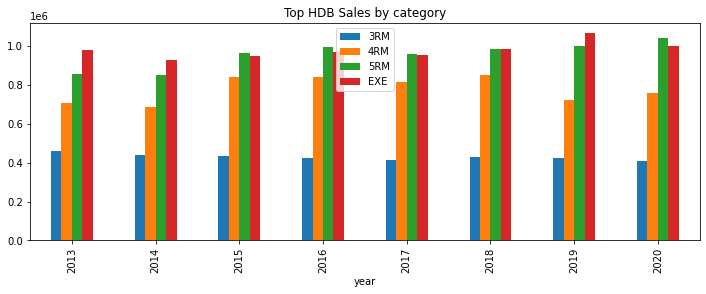

In [26]:
# width = 12 height = 4 units
plt.rcParams["figure.figsize"] = [ 12, 4 ]
# plot vertical bar graph using df_sales
df_sales.plot.bar()
plt.title( "Top HDB Sales by category" )
plt.show()  

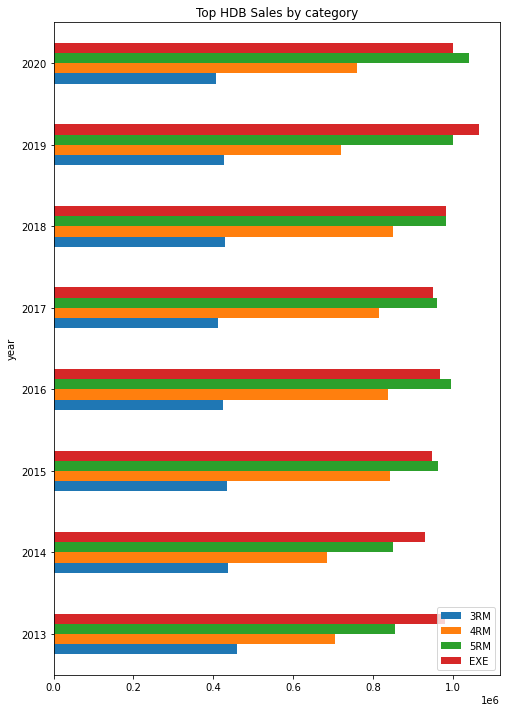

In [27]:
# width = 8 height = 12 units
plt.rcParams["figure.figsize"] = [ 8, 12 ]
# plot vertical bar graph using df_sales
df_sales.plot.barh()
plt.title( "Top HDB Sales by category" )
plt.show()  

Now copy the figures on top and paste into Excel to create your own bar chart.

Is Excel easier to create charts since you got data ?

In [28]:
# you can also download figure from df_sales into Excel CSV text file.

# uncomment below to run the code
# df_sales.to_csv("srx_data.csv")

In [29]:
# how about animated chart ?
import IPython
IPython.display.HTML('https://wingsmaker.github.io/Github/srx_info.html')
